In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score





    loading our data
  

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


finding the shape of the dataset

In [4]:
df.shape

(891, 12)

In [5]:
#to desplay 20 sample from the data set.This is to see arragement of the dataset
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.00,0,1,371362,16.1000,NaN,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.00,0,0,110152,86.5000,B77,S
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.00,0,0,234360,13.0000,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.00,0,0,248733,13.0000,F33,S
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.00,0,0,S.W./PP 752,10.5000,NaN,S
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.00,0,0,STON/O 2. 3101280,7.9250,NaN,S
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",male,9.00,1,1,C.A. 37671,15.9000,NaN,S


In [6]:
df.duplicated().sum()
#to find the number of duplicate data in the dataset

0

Data clearnimg process


In [7]:
#find info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# becouse cabin is not important for our data process and most of is entry is null. therefor we drop the column
df = df.drop(columns='Cabin', axis = 1)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [11]:
# Replace null values in specific columns with the mean of each column
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [13]:
mode_value = df['Embarked'].mode()[0]  # Calculate the mode

# Fill null values with the mode
df['Embarked'].fillna(mode_value, inplace=True)

In [14]:
#checing if the null values in The Embarked if filled with the mode
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [15]:
#use the describe() function in pandas.
# it will provide basic statistics like count, mean, standard deviation, minimum, and maximum.
#  which might not be particularly informative for date columns. 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#to count the no of peaple that survived and those that did not.
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x14d10f05650>,
 [Text(-0.3925749350994583, 1.0275626113924428, '1'),
  Text(0.3925750313068116, -1.0275625746369201, '0')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38')])

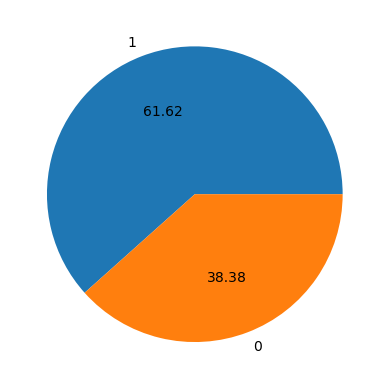

In [18]:

plt.pie(df['Survived'].value_counts(),labels=['1','0'],autopct="%0.2f")

From the analysis of the pie chart above:
1. Overall Composition: The pie chart consists of two segments: "Survived" and "Did Not Survive." The "Survived" segment occupies 38.38% of the chart, while the "Did Not Survive" segment occupies 61.62%.

2. Segment Comparison: The segment "Did Not Survive" is significantly larger than the "Survived" segment, indicating that a majority of the outcomes in this scenario resulted in not surviving.

3. Interpretation of Segments: The "Survived" segment represents individuals or entities that successfully navigated whatever scenario is being depicted, while the "Did Not Survive" segment represents those who did not. This could be interpreted in various contexts, such as survival rates in medical treatments, disaster scenarios, or business ventures.

4. Correlations: Depending on the context, correlations between survival outcomes and other factors such as age, gender, location, or treatment received could be explored to understand if certain variables are associated with higher or lower survival rates.


In [19]:
sns.set()

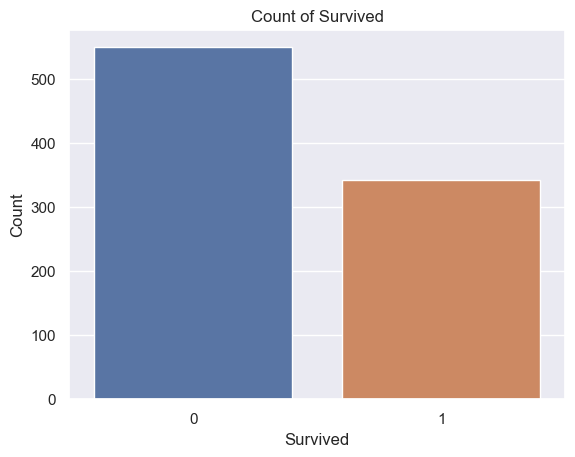

In [20]:
sns.countplot(x='Survived', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survived')
plt.show()

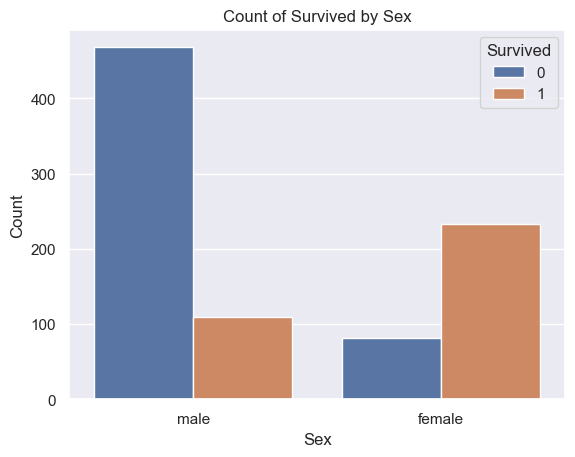

In [21]:
# analysis for both sex and survived
sns.countplot(x='Sex', hue='Survived', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Survived by Sex')
plt.legend(title='Survived', loc='upper right')
plt.show()

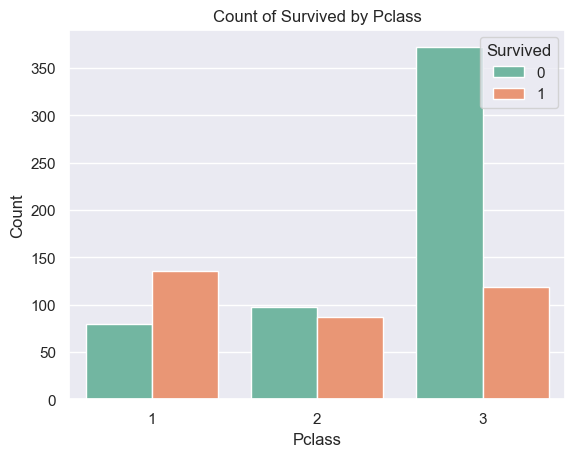

In [22]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2', hue_order=[0, 1])
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Count of Survived by Pclass')
plt.legend(title='Survived', loc='upper right')
plt.show()

In Pclass1, from the visualization above we can say that most people survived as compared to that of second and thrid class. This is due to:
1. Proximity to lifeboats: First-class passengers were typically located closer to the upper decks where lifeboats were deployed, making it easier for them to access life-saving equipment during emergencies.

2. Priority access: In many cases, first-class passengers received priority treatment during evacuations, with crew members ensuring their safety and helping them onto lifeboats first.

3. Due to location: First-class are located at the top thus reducing the death rate.

In [23]:
#The skewness of Age
skewness = df['Age'].skew()
print("Skewness of Age column:", skewness)

Skewness of Age column: 0.4344880940129925


In [24]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [25]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [26]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


Replacing some of the values with numbers:
1. sex:
  1. male with 0 (577 changed)
  2. female with 1 (314)

2. Embarked column:
   1. S with 0 (646 changed)
   2. C with 1 (168 replaced)
   3. q with 2 (77 replaced)

In [27]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Sex'] = label_encoder.fit_transform(df['Sex'])

df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [28]:
x = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y =df['Survived']

In [29]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [30]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


The next step is for spliting the data into training and testing data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [33]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


logistical Regression  and model traning

In [34]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [35]:
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
x_train_prediction = model.predict(x_train)

In [37]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy:', training_data_accuracy)

Accuracy: 0.800561797752809


In [38]:
x_test_prediction = model.predict(x_test)
print(x_test_prediction)

[1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1]


In [39]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy:', test_data_accuracy)

Accuracy: 0.7877094972067039


In [40]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [41]:
%pip install pyngrok

import subprocess
import os
from pyngrok import ngrok

In [45]:
ngrok.set_auth_token("2czjYZwNDGNO32zgpoUz39hwH9x_5GkETYiSHmq6CaHoqHeyc")
%pip install --upgrade pyngrok

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok tunnel to the flask app uding http protocl 

proc = subprocess.Popen(["ngrok", "http", "5000"])

#retrive ngrok's public url here

public_url = ngrok.connect(addr = "5000", proto = "http")

print("public URL:" , public_url)

Note: you may need to restart the kernel to use updated packages.


t=2024-02-28T03:59:14-0800 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=c6c6a6d1271a err="authentication failed: Your account is limited to 1 simultaneous ngrok agent session.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\n\nActive ngrok agent sessions in region 'us':\n  - ts_2czjVrBV0kTVAvjm1VZX2goVKMw (2c0f:6300:216:103:a527:30c2:dfec:7ff8)\r\n\r\nERR_NGROK_108\r\n"
t=2024-02-28T03:59:14-0800 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent session.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\n\nActive ngrok agent sessions in region 'us':\n  - ts_2czjVrBV0kTVAvjm1VZX2goVKMw (2c0f:6300:216:103:a527:30c2:dfec:7ff8)\r\n\r\nE

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent session.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\n\nActive ngrok agent sessions in region 'us':\n  - ts_2czjVrBV0kTVAvjm1VZX2goVKMw (2c0f:6300:216:103:a527:30c2:dfec:7ff8)\r\n\r\nERR_NGROK_108\r\n.